# Monte Carlo Tree Search

In this simple experiment we will use the MCTS algorithm to solve a simple Markov Decision Process. We will use the [POMDPs](https://github.com/JuliaPOMDP/POMDPs.jl) package and its extention [MCTS](https://github.com/JuliaPOMDP/MCTS.jl). Tutorial is avalaible [here](https://github.com/JuliaPOMDP/POMDPExamples.jl/blob/master/notebooks/GridWorld.ipynb) and examples [here](https://github.com/JuliaPOMDP/POMDPGallery.jl).

In [2]:
using MCTS # for monte carlo tree search
using POMDPs # for basic interactions
using POMDPTools
using POMDPModels # for the SimpleGridWorld problem
using POMDPSimulators #for simulating the results
using D3Trees #for tree visualizing
using Random

We will use a [simple gridworld](https://github.com/JuliaPOMDP/POMDPModels.jl/blob/master/src/gridworld.jl) as a test case:

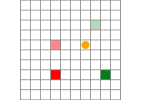

In [3]:
mdp = SimpleGridWorld()
render(mdp, (s=[7,6],))

In this problem, agent must navigate a simple, non-deterministic gridworld.  If he decided to go in a given direction (e.g. down) he will transition to the given cell with $p = 0.7$. Otherwise he will move with a probability of 0.1 in each of the remaining three directions.

Default reward for unlisted cells is 0.0, for terminal states rewards are equal to: -10 (dark red), -5 (bright red), 3 (bright green), 10 (dark green).

Before start, we will solve a problem with MCTS and visualize the results. Firstly, we will define how the nodes are labeled:

In [4]:
MCTS.node_tag(s::GWPos) = "[$(s[1]),$(s[2])]"
MCTS.node_tag(a::Symbol) = "[$a]"

Then, solve a problem:

In [5]:
n_iter = 100000
depth = 10
exploration_constant = 10.0

MCTS_solver = MCTSSolver(n_iterations=n_iter,
    depth=depth,
    exploration_constant=exploration_constant,
    enable_tree_vis=true
)

MCTS_planner = solve(MCTS_solver, mdp)
state = rand(Random.MersenneTwister(4), initialstate(mdp))

a = action(MCTS_planner, state)

:up

And visualize the results:

In [8]:
# Note, this does not appear correctly on github... to see it, run it on your local Machine
a, info = action_info(MCTS_planner, state)
D3Tree(info[:tree], init_expand=2) # click on the node to expand it

[1,3]
N: 147389

├──                     [up]
│  Q:  -0.76
│  N: 138521

│  ├──                    [1,2]
│  │  N:  25394

│  │  ├──                     [up]
│  │  │  Q:  -1.06
│  │  │  N:  18927
 (4 children)
│  │  ├──                   [down]
│  │  │  Q:  -1.50
│  │  │  N:   2841
 (4 children)
│  │  ├──                   [left]
│  │  │  Q:  -1.56
│  │  │  N:   2318
 (4 children)
│  │  └──                  [right]
│  │     Q:  -1.77
│  │     N:   1308
 (4 children)
│  ├──                    [1,4]
│  │  N: 135133

│  │  ├──                     [up]
│  │  │  Q:  -0.78
│  │  │  N: 127577
 (4 children)
│  │  ├──                   [down]
│  │  │  Q:  -1.57
│  │  │  N:   1832
 (4 children)
│  │  ├──                   [left]
│  │  │  Q:  -1.34
│  │  │  N:   3847
 (4 children)
│  │  └──                  [right]
│  │     Q:  -1.57
│  │     N:   1877
 (4 children)
│  ├──                    [1,3]
│  │  N: 147389

│  │  ├──                     [up]
│  │  │  Q:  -0.76
│  │  │  N: 138521
 (4 children)
│  │  ├──                   [down]
│  │  │  Q:  -1.47
│  │  │  N:   3706
 (4 children)
│  │  ├──                   [left]
│  │  │  Q:  -1.51
│  │  │  N:   3212
 (4 children)
│  │  └──                  [right]
│  │     Q:  -1.67
│  │     N:   1950
 (4 children)
│  └──                    [2,3]
│     N:  23223

│     ├──                     [up]
│     │  Q:  -1.20
│     │  N:  19770
 (4 children)
│     ├──                   [down]
│     │  Q:  -1.78
│     │  N:   1745
 (4 children)
│     ├──                   [left]
│     │  Q:  -1.88
│     │  N:   1358
 (4 children)
│     └──                  [right]
│        Q:  -2.75
│        N:    350
 (4 children)
├──                   [down]
│  Q:  -1.47
│  N:   3706

│  ├──                    [1,4]
│  │  N: 135133

│  │  ├──                     [up]
│  │  │  Q:  -0.78
│  │  │  N: 127577
 (4 children)
│  │  ├──                   [down]
│  │  │  Q:  -1.57
│  │  │  N:   1832
 (4 children)
│  │  ├──                   [left]
│  │  │  Q:  -1.34
│  │  │  N:   3847
 (4 children)
│  │  └──                  [right]
│  │     Q:  -1.57
│  │     N:   1877
 (4 children)
│  ├──                    [1,3]
│  │  N: 147389

│  │  ├──                     [up]
│  │  │  Q:  -0.76
│  │  │  N: 138521
 (4 children)
│  │  ├──                   [down]
│  │  │  Q:  -1.47
│  │  │  N:   3706
 (4 children)
│  │  ├──                   [left]
│  │  │  Q:  -1.51
│  │  │  N:   3212
 (4 children)
│  │  └──                  [right]
│  │     Q:  -1.67
│  │     N:   1950
 (4 children)
│  ├──                    [2,3]
│  │  N:  23223

│  │  ├──                     [up]
│  │  │  Q:  -1.20
│  │  │  N:  19770
 (4 children)
│  │  ├──                   [down]
│  │  │  Q:  -1.78
│  │  │  N:   1745
 (4 children)
│  │  ├──                   [left]
│  │  │  Q:  -1.88
│  │  │  N:   1358
 (4 children)
│  │  └──                  [right]
│  │     Q:  -2.75
│  │     N:    350
 (4 children)
│  └──                    [1,2]
│     N:  25394

│     ├──                     [up]
│     │  Q:  -1.06
│     │  N:  18927
 (4 children)
│     ├──                   [down]
│     │  Q:  -1.50
│     │  N:   2841
 (4 children)
│     ├──                   [left]
│     │  Q:  -1.56
│     │  N:   2318
 (4 children)
│     └──                  [right]
│        Q:  -1.77
│        N:   1308
 (4 children)
├──                   [left]
│  Q:  -1.51
│  N:   3212

│  ├──                    [1,4]
│  │  N: 135133

│  │  ├──                     [up]
│  │  │  Q:  -0.78
│  │  │  N: 127577
 (4 children)
│  │  ├──                   [down]
│  │  │  Q:  -1.57
│  │  │  N:   1832
 (4 children)
│  │  ├──                   [left]
│  │  │  Q:  -1.34
│  │  │  N:   3847
 (4 children)
│  │  └──                  [right]
│  │     Q:  -1.57
│  │     N:   1877
 (4 children)
│  ├──                    [1,3]
│  │  N: 147389

│  │  ├──                     [up]
│  │  │  Q:  -0.76
│  │  │  N: 138521
 (4 children)
│  │  ├──                   [down]
│  │  │  Q:  -1.47
│  │  │  N:   3706
 (4 children)
│  │  ├──          

Finally, we could use the simulation to check the quality of the solution:

In [7]:
# Create and run the rollout simulator
rollout_sim = RolloutSimulator(max_steps=200);
MCTS_reward = simulate(rollout_sim, mdp, MCTS_planner);
@show MCTS_reward;

MCTS_reward = 4.401266686517652


4.401266686517652